In [1]:
import pandas as pd
import os
import sklearn

### This is a Dataset Related to

On Poshmark, the price for an item is set by the user who is lisfing the item. Some users who are listing for the ﬁrst fime, struggle to set an appropriate price for their item. To help such users, we want to develop a model which suggests an appropriate lisfing price when the item is being listed. The inputs to such a model will be the atributes of the lisfing that the user enters while creafing the lisfing.

To develop this model, we have provided a sample of sold lisfings from the year 2019. The dataset is a CSV ﬁle. A brief descripfion of the ﬁelds is as follows -


In [2]:

df=pd.read_csv('C:/Users/pc/Desktop/Companys_Assignment/ds-take-home-dataset.csv')

In [3]:
df.head()

,id,attr1,attr2,attr3,attr4,attr5,attr6,title,sold_price
0,742122,4,27,149.0,3808.0,1.0,99.0,one teaspoon bandit distressed denim shorts (23),65.0
1,652751,4,3,89.0,1996.0,NaN,1500.0,gucci emily mini guccissima mini red leather bag,600.0
2,228229,4,26,301.0,5194.0,NaN,89.0,steve madden polka dot wedges 8.5 - wi06,12.0
3,645810,4,27,NaN,6335.0,NaN,0.0,crown & ivy navy blue floral print shorts,12.0
4,854374,4,22,302.0,3606.0,2.0,45.0,grey wide leg dress pants,22.0


In [4]:
df.describe(include='all')

,id,attr1,attr2,attr3,attr4,attr5,attr6,title,sold_price
count,1.029850e+06,1.029850e+06,1.029850e+06,843080.000000,864417.000000,495664.000000,1.029850e+06,1029761,1.029850e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,840460,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gucci belt,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,809,NaN
mean,4.999636e+05,3.792792e+00,1.611883e+01,170.677981,3026.511901,1.452339,4.572187e+09,NaN,1.959587e+02
std,2.886351e+05,5.353355e-01,1.087543e+01,91.907382,1842.932124,0.497728,4.594750e+12,NaN,1.440187e+03
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,0.000000e+00,NaN,0.000000e+00
25%,2.500282e+05,4.000000e+00,3.000000e+00,89.000000,1453.000000,1.000000,2.700000e+01,NaN,1.500000e+01
50%,4.999745e+05,4.000000e+00,1.400000e+01,180.000000,2896.000000,1.000000,1.190000e+02,NaN,5.000000e+01
75%,7.499088e+05,4.000000e+00,2.600000e+01,252.000000,4425.000000,2.000000,6.000000e+02,NaN,2.790000e+02


## Checking the datatypes 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029850 entries, 0 to 1029849
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1029850 non-null  int64  
 1   attr1       1029850 non-null  int64  
 2   attr2       1029850 non-null  int64  
 3   attr3       843080 non-null   float64
 4   attr4       864417 non-null   float64
 5   attr5       495664 non-null   float64
 6   attr6       1029850 non-null  float64
 7   title       1029761 non-null  object 
 8   sold_price  1029850 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 70.7+ MB


## Checking for the NaN values in the Dataset
    # Attribute 3, Attribute4, Attribute5 has NaN values

In [6]:
df.isna().sum()

id                 0
attr1              0
attr2              0
attr3         186770
attr4         165433
attr5         534186
attr6              0
title             89
sold_price         0
dtype: int64

### Checking for a missing values percentage

In [7]:

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [8]:
missing_value_df.reset_index(drop='index',inplace=True)

In [9]:
missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)

#### Here if we observe , the percentage of missing values of attribue 5 is higher
    # Hence removing attribute5 
    

In [10]:
missing_value_df[missing_value_df['percent_missing']>0.0001]

,column_name,percent_missing
5,attr5,51.870272
3,attr3,18.135651
4,attr4,16.063796
7,title,0.008642


### Dropping the duplicates in the data

In [11]:
df.drop_duplicates(inplace=True)
    

In [12]:
# Some of the duplicates rows has been removed
df.shape

(1019647, 9)

### Dropping the unnecessary columns which are not ment for Regression
    # Dropping ID column sice its only an identification of the product
    # Dropping the attribute 5 since it has 51% of missing values
    # Dropping title listing which doesnt make difference, applying the Linear and Non-Linear Models.

In [13]:
df.drop(columns=['id','attr5','title'],axis=1,inplace=True)

In [14]:
df.head()

,attr1,attr2,attr3,attr4,attr6,sold_price
0,4,27,149.0,3808.0,99.0,65.0
1,4,3,89.0,1996.0,1500.0,600.0
2,4,26,301.0,5194.0,89.0,12.0
3,4,27,NaN,6335.0,0.0,12.0
4,4,22,302.0,3606.0,45.0,22.0


### Understanding the Data
    --> Attribute-1 has four distinct categorys [1,2,3,4]
        -> Attr-1 with category-3 has highest averge amount belongs to Attr-6.
        -> Attr-1 with category-1 has lowest averge amount belongs to Attr-6.
    --> Attribute-2 has 35 distinct categories
        -> Attr-2 with category-26 has highest averge amount belongs to Attr-6.
        -> Attr-2 with category-21 has lowest averge amount belongs to Attr-6.
    -> Attribute-3 has 306 Categories and Attribute -4 has 6640 categories.
        

In [15]:
l=['attr1','attr2','attr3','attr4']
for i in l:
    print('Attributes pivot Table :', i)
    piv1=df.pivot_table(values=['attr6'],columns=[i], aggfunc=['mean'])  
    print('The max value in ',str(i),'-value',piv1['mean'].idxmax(axis=1),piv1.max(axis=1))
    print('\n')
    print('The min value in ',str(i),'-value',piv1['mean'].idxmin(axis=1),piv1.min(axis=1))
    print('\n')
    


Attributes pivot Table : attr1
The max value in  attr1 -value attr6    3
dtype: int64 attr6    4.122325e+10
dtype: float64


The min value in  attr1 -value attr6    1
dtype: int64 attr6    558.217563
dtype: float64


Attributes pivot Table : attr2
The max value in  attr2 -value attr6    26
dtype: int64 attr6    2.308479e+10
dtype: float64


The min value in  attr2 -value attr6    21
dtype: int64 attr6    45.66607
dtype: float64


Attributes pivot Table : attr3
The max value in  attr3 -value attr6    252.0
dtype: float64 attr6    9.684083e+10
dtype: float64


The min value in  attr3 -value attr6    52.0
dtype: float64 attr6    0.0
dtype: float64


Attributes pivot Table : attr4
The max value in  attr4 -value attr6    3760.0
dtype: float64 attr6    2.888845e+12
dtype: float64


The min value in  attr4 -value attr6    5.0
dtype: float64 attr6    0.0
dtype: float64




### Understanding the Data
    --> Attribute-1 has four distinct categorys [1,2,3,4]
        -> Attr-1 with category-4 has highest averge amount belongs to sold_price
        -> Attr-1 with category-2 has lowest averge amount belongs to sold_price.
    --> Attribute-2 has 35 distinct categories
        -> Attr-2 with category-3 has highest averge amount belongs to sold_price.
        -> Attr-2 with category-21 has lowest averge amount belongs to sold_price.
    -> Attribute-3 has 306 Categories and Attribute -4 has 6640 categories.

In [16]:
l=['attr1','attr2','attr3','attr4']
for i in l:
    print('Attributes pivot Table :', i)
    piv1=df.pivot_table(values=['sold_price'],columns=[i], aggfunc=['mean'])  
    print('The max value in ',str(i),'-value',piv1['mean'].idxmax(axis=1),piv1.max(axis=1))
    print('\n')
    print('The min value in ',str(i),'-value',piv1['mean'].idxmin(axis=1),piv1.min(axis=1))
    print('\n')


Attributes pivot Table : attr1
The max value in  attr1 -value sold_price    4
dtype: int64 sold_price    206.226583
dtype: float64


The min value in  attr1 -value sold_price    2
dtype: int64 sold_price    22.777941
dtype: float64


Attributes pivot Table : attr2
The max value in  attr2 -value sold_price    3
dtype: int64 sold_price    445.918396
dtype: float64


The min value in  attr2 -value sold_price    21
dtype: int64 sold_price    9.886204
dtype: float64


Attributes pivot Table : attr3
The max value in  attr3 -value sold_price    261.0
dtype: float64 sold_price    807.227492
dtype: float64


The min value in  attr3 -value sold_price    200.0
dtype: float64 sold_price    7.362857
dtype: float64


Attributes pivot Table : attr4
The max value in  attr4 -value sold_price    5889.0
dtype: float64 sold_price    2983.333333
dtype: float64


The min value in  attr4 -value sold_price    564.0
dtype: float64 sold_price    1.7
dtype: float64




### plotting graphs to understand data distribution

In [17]:
df.head()

,attr1,attr2,attr3,attr4,attr6,sold_price
0,4,27,149.0,3808.0,99.0,65.0
1,4,3,89.0,1996.0,1500.0,600.0
2,4,26,301.0,5194.0,89.0,12.0
3,4,27,NaN,6335.0,0.0,12.0
4,4,22,302.0,3606.0,45.0,22.0


### Bar_plot visualisation of Attributes
- Category 4 has more count in Attribute-1 [attr1]

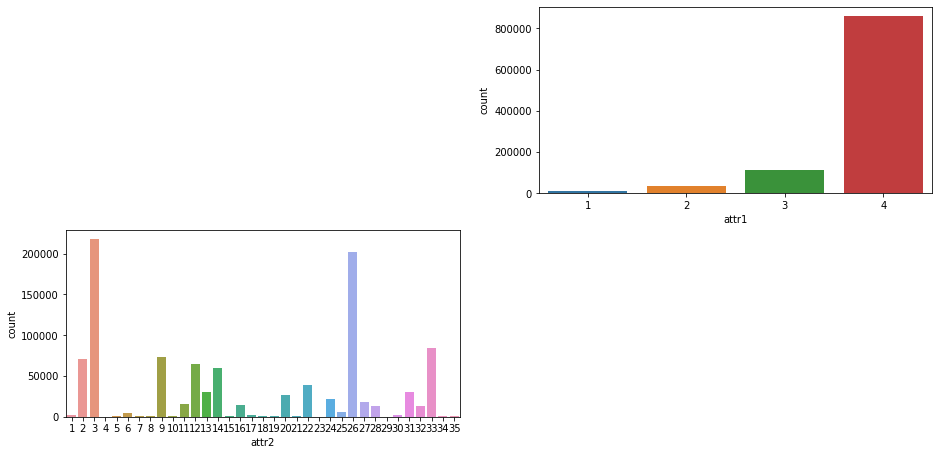

In [18]:
list1=['attr1', 'attr2']
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(24,24))
for i,name in enumerate(list1):
    fignum=2*i+1
    plt.subplot(6,3,fignum+1)
    #plt.title(name+'--Values_count')
    sns.countplot(x=df[name])
plt.savefig('Barplot_attr1,2.jpg')

### Checking the distribution for the attributes
- Target variable(sold_price) is highly right skewed , since the skewness is positive
- Kurtosis is also heavily tailed

In [19]:
from scipy.stats import kurtosis, skew
print('The kurtosis of Sold_price',kurtosis(df['sold_price']),'\n','The Skewness of sold_price is:',skew(df['sold_price']))

The kurtosis of Sold_price 176055.76475453857 
 The Skewness of sold_price is: 358.66643268552093


### Multiple spikes can be clearly obseved , which clearly indicates the target variable is not Normally distributed.

C:\Users\pc\Anaconda3\envs\project1\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


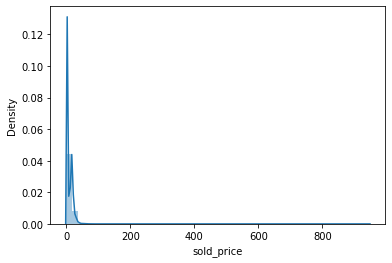

In [20]:
#The Distribution is Right Skewed
# It is transformed to reduce the magnitude 
import seaborn as sns
import numpy as np
sns.distplot(np.sqrt(df['sold_price']))
plt.savefig('distribution.jpg')

### Data Preprocesssing
    # Deriving methods for NaN imputations
    # Here I have chossen KNN imputer for the NaN values

In [21]:
df.isna().sum()

attr1              0
attr2              0
attr3         184946
attr4         163773
attr6              0
sold_price         0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019647 entries, 0 to 1029849
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   attr1       1019647 non-null  int64  
 1   attr2       1019647 non-null  int64  
 2   attr3       834701 non-null   float64
 3   attr4       855874 non-null   float64
 4   attr6       1019647 non-null  float64
 5   sold_price  1019647 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 54.5 MB


###### The missing values are present in attr3 and attr4

In [23]:
df.head()

,attr1,attr2,attr3,attr4,attr6,sold_price
0,4,27,149.0,3808.0,99.0,65.0
1,4,3,89.0,1996.0,1500.0,600.0
2,4,26,301.0,5194.0,89.0,12.0
3,4,27,NaN,6335.0,0.0,12.0
4,4,22,302.0,3606.0,45.0,22.0


## Before going for imputations,  splitting the data randomly
- 10,000 total observations has been taken in to count, due tomemory constraints
- 7000 has taken to Training data, 3000 has taken for Testing

In [24]:
X=df.iloc[5000:15000,:-1]
y=pd.DataFrame(df.iloc[5000:15000,-1])

In [25]:
X.head()

,attr1,attr2,attr3,attr4,attr6
5000,4,33,271.0,3777.0,0.0
5001,4,3,14.0,1228.0,328.0
5002,3,26,168.0,2896.0,705.0
5003,2,26,40.0,5744.0,100.0
5004,4,33,267.0,2005.0,0.0


In [26]:
y.head()

,sold_price
5000,11.0
5001,115.0
5002,300.0
5003,50.0
5004,42.0


In [27]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
Train=pd.concat([X_train,y_train],axis=1)

In [29]:
Train.head()

,attr1,attr2,attr3,attr4,attr6,sold_price
14069,3,2,24.0,NaN,375.0,169.0
7603,4,12,NaN,948.0,625.0,220.0
12738,4,26,138.0,NaN,535.0,300.0
6579,4,14,44.0,1395.0,1050.0,350.0
10058,4,3,NaN,1996.0,2500.0,300.0


###### KNN imputation for NaN values

In [30]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors= 3)
imputer_train = imputer.fit_transform(Train)

## Renaming the column names

In [31]:
df_imputed_train=pd.DataFrame(imputer_train)
df_imputed_train.rename(columns={0:'attr1',1:'attr2',2:'attr3',3:'attr4',4:'attr6',5:'sold_price'},inplace=True)



## Standardising the Train Dataset
- Applying Labelling to the categorical attributes [1,2,3,4]
- Applying MinMaxScaler to the numerical variables Attr 6, Sold_price

In [32]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler

list_cat=['attr1','attr2','attr3','attr4']
list_num=['attr6','sold_price']

for i in list_cat:
    df_imputed_train[i]=LabelEncoder().fit_transform(df_imputed_train[i])
for i in list_num:
    df_imputed_train[i]=MinMaxScaler().fit_transform(df_imputed_train[i].values.reshape(-1,1))



###### Changing the data types from int to float

In [33]:
list22=['attr1','attr2','attr3','attr3','attr4']
for i in list22:
    df_imputed_train[i]=df_imputed_train[i].astype('category')

df_imputed_train.shape

(7000, 6)

In [34]:
df_imputed_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   attr1       7000 non-null   category
 1   attr2       7000 non-null   category
 2   attr3       7000 non-null   category
 3   attr4       7000 non-null   category
 4   attr6       7000 non-null   float64 
 5   sold_price  7000 non-null   float64 
dtypes: category(4), float64(2)
memory usage: 273.3 KB


## Checking for Tranformations
- Assumption lies that the Target variable should be a Normal distribution curve

C:\Users\pc\Anaconda3\envs\project1\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


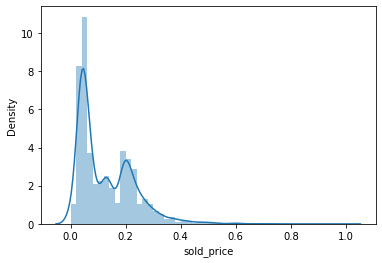

In [35]:
from math import sqrt,log
import numpy as np
#The Distribution is Right Skewd
df_lod=np.sqrt(df_imputed_train['sold_price'])
sns.distplot((df_lod))
plt.savefig('distribution.jpg')

###### Q-Q plot shows how our data is devaiting from the standard Normal 

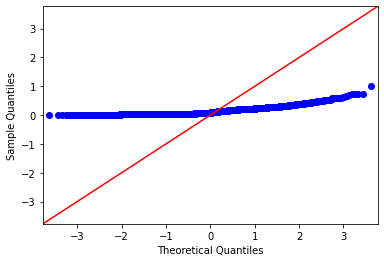

In [36]:
### Q-Q plot for Target variable to check the deviation
import numpy as np 
import statsmodels.api as sm 
import pylab as py 
import matplotlib.pyplot
    
sm.qqplot(np.sqrt(df_imputed_train['sold_price']), line ='45')
py.show() 

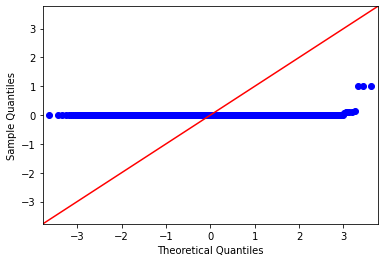

In [37]:
### Q-Q plot for feature with 'attr6' to check the deviation
sm.qqplot(df_imputed_train['attr6'], line ='45')
py.show()

In [38]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors= 3)
imputer_test = imputer.fit_transform(pd.concat([X_test,y_test],axis=1))

In [39]:
df_imputed_test=pd.DataFrame(imputer_test)
df_imputed_test.rename(columns={0:'attr1',1:'attr2',2:'attr3',3:'attr4',4:'attr6',5:'sold_price'},inplace=True)


## Standardising the Test Dataset
- Applying Labelling to the categorical attributes [1,2,3,4]
- Applying MinMaxScaler to the numerical variables Attr 6, Sold_price

In [40]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler

list_cat=['attr1','attr2','attr3','attr4']
list_num=['attr6','sold_price']

for i in list_cat:
    df_imputed_test[i]=LabelEncoder().fit_transform(df_imputed_test[i])
for i in list_num:
    df_imputed_test[i]=MinMaxScaler().fit_transform(df_imputed_test[i].values.reshape(-1,1))



In [41]:
list22=['attr1','attr2','attr3','attr3','attr4']
for i in list22:
  df_imputed_test[i]=df_imputed_test[i].astype('category')

df_imputed_test.shape

(3000, 6)

In [42]:
df_imputed_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   attr1       3000 non-null   category
 1   attr2       3000 non-null   category
 2   attr3       3000 non-null   category
 3   attr4       3000 non-null   category
 4   attr6       3000 non-null   float64 
 5   sold_price  3000 non-null   float64 
dtypes: category(4), float64(2)
memory usage: 138.6 KB


##### From this time our Independent variables as :X_tr, X_ts ,
###### Target variables as : y_tr, y_ts

In [43]:
X_tr=df_imputed_train.iloc[:,:-1]
X_ts=df_imputed_test.iloc[:,:-1]
y_tr=df_imputed_train.iloc[:,-1]
y_ts=df_imputed_test.iloc[:,-1]

print(X_tr.shape,X_test.shape,y_tr.shape,y_ts.shape)

(7000, 5) (3000, 5) (7000,) (3000,)


###### Checking with Model implementation

## Linear Regression Model

##### In parametric models we apply to do one hot encoding  since every prameter is important to get the correlation to the target variable

In [44]:
X_tr_Lin=pd.get_dummies(X_tr)
X_ts_Lin=pd.get_dummies(X_ts)

##### If we clearly observe X_tr and X_ts doesnt have same unique features, hence for Linear model going with one hot encoding is not feseable
##### Hence we stick to the label encoding.

In [45]:
print(X_tr.nunique())
print(X_ts.nunique())

attr1       4
attr2      34
attr3     618
attr4    2083
attr6     629
dtype: int64
attr1       4
attr2      33
attr3     452
attr4    1123
attr6     467
dtype: int64


##### We have total 2740 features 

In [46]:
X_tr_Lin.head()

,attr6,attr1_0,attr1_1,attr1_2,attr1_3,attr2_0,attr2_1,attr2_2,attr2_3,attr2_4,...,attr4_2073,attr4_2074,attr4_2075,attr4_2076,attr4_2077,attr4_2078,attr4_2079,attr4_2080,attr4_2081,attr4_2082
0,0.000375,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000625,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000535,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.001050,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.002500,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


##### We have total 1613 features in test set

In [47]:
X_ts_Lin.head()

,attr6,attr1_0,attr1_1,attr1_2,attr1_3,attr2_0,attr2_1,attr2_2,attr2_3,attr2_4,...,attr4_1113,attr4_1114,attr4_1115,attr4_1116,attr4_1117,attr4_1118,attr4_1119,attr4_1120,attr4_1121,attr4_1122
0,0.000000,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000025,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000048,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.000085,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000099,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
from sklearn.linear_model import LinearRegression

Lin=LinearRegression()
Lin.fit(X_tr,y_tr)

LinearRegression()

## Test Results Linear Regression
##### - Mean squared error and Ajusted R2 are the paramters taken in to consideration to evaluate the model
    1) Adjusted R^2 which tells how good our model is, how well the target variable is related to Independent columns.\
    2) Root mean squared Error tells about the same , how much our model is devating from the actual. 

In [49]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

y_pred_ts=Lin.predict(X_ts)

rms_test = sqrt(mean_squared_error(y_ts, y_pred_ts))
r2_value=r2_score(y_ts,y_pred_ts)

# Adjusted R Squared
Adjusted_R2 = 1 - (1-r2_value)*(len(y_ts)-1)/(len(y_ts)-X_ts.shape[1]-1)


print('Root mean squared error for unseen data Linear Regression:',rms_test," \n")
print('Adjusted R^2 corrleation value on unseen data Linear Regression:',Adjusted_R2," \n")

y_pred_tr=Lin.predict(X_tr)

rms_train = sqrt(mean_squared_error(y_tr, y_pred_tr))
r2_value=r2_score(y_tr,y_pred_tr)

Adjusted_R2 = 1 - (1-r2_value)*(len(y_tr)-1)/(len(y_tr)-X_tr.shape[1]-1)

print('Root mean squared error on train data  Linear Regression:',rms_train," \n")
print('Adjusted R^2 corrleation value on Train data Linear Regression:',Adjusted_R2," \n")


Root mean squared error for unseen data Linear Regression: 0.05310010043907203  

Adjusted R^2 corrleation value on unseen data Linear Regression: 0.12278710041464891  

Root mean squared error on train data  Linear Regression: 0.041082569500897205  

Adjusted R^2 corrleation value on Train data Linear Regression: 0.13213094193209507  



##### Cross validation on Train Dataset
- _Checking the cross validation using <b>Negative Root mean squred error</b> as the metric on the Train dataset Linear Regression Model_.


In [50]:
from sklearn.model_selection import cross_val_score 
Lin=LinearRegression()
neg_MSE = cross_val_score(estimator = Lin, X = X_tr,\
     y = y_tr, cv = 5,verbose=2,scoring='neg_root_mean_squared_error')
print("Negative mean_squared_error value {} Negative mean_squared_error Variance \
     {}".format(neg_MSE.mean(),neg_MSE.std()))

[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
Negative mean_squared_error value -0.040979278177371556 Negative mean_squared_error Variance      0.003616382748620527


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


#### Combinations of Features using Linear Regression model
- In this there are five columns present hence we have taken 5C1+5C2+5C4+5C5 combinations.
- Each combination is represented in the seperate cell.
-  Base model <b>Decision Tree Regression</b> is taken in to consideration for eavluating the combination models. 

In [51]:
from itertools import combinations 
from sklearn.tree import DecisionTreeRegressor
for j in range(1,len(X_tr.columns)):    
    cm=combinations(X_tr.columns,j)
   
    for k in list(cm):
        
        Lin=DecisionTreeRegressor()
        
        Lin.fit(X_tr.loc[:,list(k)],y_tr)
        

        y_pred_tr=Lin.predict(X_tr.loc[:,list(k)])

        r2_value=r2_score(y_tr,y_pred_tr)
        Adjusted_R2 = 1 - (1-r2_value)*(len(y_tr)-1)/(len(y_tr)-X_tr.loc[:,list(k)].shape[1]-1)
            
        print('Adjusted R^2 corrleation value on',X_tr.loc[:,list(k)].columns,\
        'Train data Decision Tree Regression:',Adjusted_R2,end=" \n")

Adjusted R^2 corrleation value on Index(['attr1'], dtype='object') Train data Decision Tree Regression: 0.013701471626981432 
Adjusted R^2 corrleation value on Index(['attr2'], dtype='object') Train data Decision Tree Regression: 0.22353717434659626 
Adjusted R^2 corrleation value on Index(['attr3'], dtype='object') Train data Decision Tree Regression: 0.29363898863961035 
Adjusted R^2 corrleation value on Index(['attr4'], dtype='object') Train data Decision Tree Regression: 0.512473425739714 
Adjusted R^2 corrleation value on Index(['attr6'], dtype='object') Train data Decision Tree Regression: 0.5633004953164661 
Adjusted R^2 corrleation value on Index(['attr1', 'attr2'], dtype='object') Train data Decision Tree Regression: 0.22917980882797373 
Adjusted R^2 corrleation value on Index(['attr1', 'attr3'], dtype='object') Train data Decision Tree Regression: 0.3125010645501617 
Adjusted R^2 corrleation value on Index(['attr1', 'attr4'], dtype='object') Train data Decision Tree Regressio

## Feature selection
- OLS model application to get the Feature importance
- Intially started with total features, then procedded with backward elimination

###### Summary from OLS
#### All the features from attr1,attr2,attr3,attr3, attr6 are the important features for the prediction of Sold_price
####  Also P values indicates the significance of the feature , if you clearly observe all the OLS models , P_value<0.05
#### Clearly indicating the significance of the features

In [52]:
import statsmodels.api as sm
Ols = sm.OLS(y_tr,X_tr).fit()
Ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             sold_price   R-squared (uncentered):                   0.358
Model:                            OLS   Adj. R-squared (uncentered):              0.358
Method:                 Least Squares   F-statistic:                              781.7
Date:                Thu, 01 Oct 2020   Prob (F-statistic):                        0.00
Time:                        23:07:24   Log-Likelihood:                          12358.
No. Observations:                7000   AIC:                                 -2.471e+04
Df Residuals:                    6995   BIC:                                 -2.467e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
attr1          0.0157      0.000     36.553      0.000       0.015       0.016
attr2         -0.0012   4.54e-05    -25.806      0.000      -0.001      -0.001
attr3       1.782e-05   2.32e-06      7.666      0.000    1.33e-05    2.24e-05
attr4      -6.481e-06   7.49e-07     -8.647      0.000   -7.95e-06   -5.01e-06
attr6          0.0675      0.024      2.855      0.004       0.021       0.114
==============================================================================
Omnibus:                     7654.717   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1267412.962
Skew:                           5.296   Prob(JB):                         0.00
Kurtosis:                      68.063   Cond. No.                     5.88e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Ecluded attr6 observing the behaviour of Adjusted R2
- Almost if the variable has included or not , it doesnt have any effect

In [53]:
## Excluding the attribute 6

import statsmodels.api as sm
Ols = sm.OLS(y_tr,X_tr[['attr1','attr2','attr3','attr4']]).fit()
Ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             sold_price   R-squared (uncentered):                   0.358
Model:                            OLS   Adj. R-squared (uncentered):              0.357
Method:                 Least Squares   F-statistic:                              974.1
Date:                Thu, 01 Oct 2020   Prob (F-statistic):                        0.00
Time:                        23:07:25   Log-Likelihood:                          12354.
No. Observations:                7000   AIC:                                 -2.470e+04
Df Residuals:                    6996   BIC:                                 -2.467e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
attr1          0.0157      0.000     36.651      0.000       0.015       0.017
attr2         -0.0012   4.54e-05    -25.888      0.000      -0.001      -0.001
attr3       1.788e-05   2.33e-06      7.691      0.000    1.33e-05    2.24e-05
attr4      -6.498e-06    7.5e-07     -8.666      0.000   -7.97e-06   -5.03e-06
==============================================================================
Omnibus:                     7649.468   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1261777.973
Skew:                           5.290   Prob(JB):                         0.00
Kurtosis:                      67.916   Cond. No.                     1.07e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Ecluded attr4 observing the behaviour of Adjusted R2
- If the feature has removed , it does have effect on Adj R2 which is decrasing.

In [54]:
## Excluding the attribute 4

import statsmodels.api as sm
Ols = sm.OLS(y_tr,X_tr[['attr1','attr2','attr3','attr6']]).fit()
Ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             sold_price   R-squared (uncentered):                   0.352
Model:                            OLS   Adj. R-squared (uncentered):              0.351
Method:                 Least Squares   F-statistic:                              948.4
Date:                Thu, 01 Oct 2020   Prob (F-statistic):                        0.00
Time:                        23:07:25   Log-Likelihood:                          12321.
No. Observations:                7000   AIC:                                 -2.463e+04
Df Residuals:                    6996   BIC:                                 -2.461e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
attr1          0.0140      0.000     36.348      0.000       0.013       0.015
attr2         -0.0012   4.53e-05    -26.968      0.000      -0.001      -0.001
attr3       1.482e-05   2.31e-06      6.414      0.000    1.03e-05    1.93e-05
attr6          0.0691      0.024      2.908      0.004       0.023       0.116
==============================================================================
Omnibus:                     7671.456   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1265577.782
Skew:                           5.319   Prob(JB):                         0.00
Kurtosis:                      68.007   Cond. No.                     1.87e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Ecluded attr3 observing the behaviour of Adjusted R2
-  If the feature has removed , it does have effect on Adj R2 which is decrasing.

In [55]:
## Excluding the attribute 3

import statsmodels.api as sm
Ols = sm.OLS(y_tr,X_tr[['attr1','attr2','attr4','attr6']]).fit()
Ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             sold_price   R-squared (uncentered):                   0.353
Model:                            OLS   Adj. R-squared (uncentered):              0.353
Method:                 Least Squares   F-statistic:                              954.5
Date:                Thu, 01 Oct 2020   Prob (F-statistic):                        0.00
Time:                        23:07:25   Log-Likelihood:                          12329.
No. Observations:                7000   AIC:                                 -2.465e+04
Df Residuals:                    6996   BIC:                                 -2.462e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
attr1          0.0174      0.000     47.455      0.000       0.017       0.018
attr2         -0.0012   4.56e-05    -25.600      0.000      -0.001      -0.001
attr4      -5.624e-06   7.44e-07     -7.558      0.000   -7.08e-06   -4.17e-06
attr6          0.0693      0.024      2.921      0.003       0.023       0.116
==============================================================================
Omnibus:                     7591.217   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1213689.984
Skew:                           5.229   Prob(JB):                         0.00
Kurtosis:                      66.654   Cond. No.                     5.70e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Ecluded attr2 observing the behaviour of Adjusted R2
-  If the feature has removed , it does have effect on Adj R2 which is decrasing.
-  It is an important vairiable

In [56]:
## Excluding the attribute 2

import statsmodels.api as sm
Ols = sm.OLS(y_tr,X_tr[['attr1','attr3','attr4','attr6']]).fit()
Ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             sold_price   R-squared (uncentered):                   0.297
Model:                            OLS   Adj. R-squared (uncentered):              0.297
Method:                 Least Squares   F-statistic:                              740.2
Date:                Thu, 01 Oct 2020   Prob (F-statistic):                        0.00
Time:                        23:07:25   Log-Likelihood:                          12040.
No. Observations:                7000   AIC:                                 -2.407e+04
Df Residuals:                    6996   BIC:                                 -2.404e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
attr1          0.0107      0.000     26.726      0.000       0.010       0.012
attr3         1.7e-05   2.43e-06      6.992      0.000    1.22e-05    2.18e-05
attr4      -8.914e-06   7.78e-07    -11.457      0.000   -1.04e-05   -7.39e-06
attr6          0.0854      0.025      3.452      0.001       0.037       0.134
==============================================================================
Omnibus:                     7545.640   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1069647.401
Skew:                           5.222   Prob(JB):                         0.00
Kurtosis:                      62.652   Cond. No.                     5.87e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Ecluded attr1 observing the behaviour of Adjusted R2
-  If the feature has removed , it does have effect on Adj R2 which is decrasing.
-  It is an important vairiable

In [57]:
## Excluding the attribute 1

import statsmodels.api as sm
Ols = sm.OLS(y_tr,X_tr[['attr2','attr3','attr4','attr6']]).fit()
Ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             sold_price   R-squared (uncentered):                   0.236
Model:                            OLS   Adj. R-squared (uncentered):              0.235
Method:                 Least Squares   F-statistic:                              540.0
Date:                Thu, 01 Oct 2020   Prob (F-statistic):                        0.00
Time:                        23:07:25   Log-Likelihood:                          11746.
No. Observations:                7000   AIC:                                 -2.348e+04
Df Residuals:                    6996   BIC:                                 -2.346e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
attr2         -0.0004   4.43e-05     -9.698      0.000      -0.001      -0.000
attr3       6.237e-05   2.16e-06     28.880      0.000    5.81e-05    6.66e-05
attr4       5.758e-06   7.32e-07      7.870      0.000    4.32e-06    7.19e-06
attr6          0.0964      0.026      3.740      0.000       0.046       0.147
==============================================================================
Omnibus:                     7233.619   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           910904.445
Skew:                           4.882   Prob(JB):                         0.00
Kurtosis:                      58.025   Cond. No.                     5.87e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### VIF Calculation
- If  VIF<4 There is no Multi colinearity.
- If  4<=VIF<=10 There is Moderate Multi colinearity.
- If  VIF>10 There is a definite Multi colinearity

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

###### Minutes of VIF calculation
- Attribute 1 has a moderate multicollinearity
- Rest of all has no multicollinearity

In [59]:
calc_vif(X_tr)

,variables,VIF
0,attr1,6.069328
1,attr2,2.730354
2,attr3,3.373696
3,attr4,3.270869
4,attr6,1.003382


## Decision Tree Regressor
- Intially performing Randomized Search on the pramaters available in the Decision Tree Regressor Model.
- Also in Randomzed Search N-iterations has been taken only 5 due to memory constrains.
- You can good to go with higher iterations.
- After getting best paramters those have to be substituted in to the algorithm.

In [60]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

params = {'criterion' : ["mse", "mae"],'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4, 5],\
          'max_depth':list(range(8, 100,2))}
dt = DecisionTreeRegressor()
clf=RandomizedSearchCV(estimator = dt, param_distributions = params, n_iter = 25, cv = 5,\
                               verbose=3, random_state=42, n_jobs = -1)

clf.fit(X_tr, y_tr)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   12.5s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [8, 10, 12, 14, 16, 18, 20,
                                                      22, 24, 26, 28, 30, 32,
                                                      34, 36, 38, 40, 42, 44,
                                                      46, 48, 50, 52, 54, 56,
                                                      58, 60, 62, 64, 66, ...],
                                        'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8,
                                                           9, 10, 11, 12, 13,
                                                           14, 15, 16, 17, 18,
                                                           19, 20, 21, 22, 23,
                                                           24, 25, 26, 27, 28,
                                        

###### Paste this best estimater in the Model DT(Decision Tree)

In [61]:
clf.best_estimator_

DecisionTreeRegressor(max_depth=20, max_leaf_nodes=22, min_samples_split=3)

In [62]:
from sklearn.tree import DecisionTreeRegressor

Dt=DecisionTreeRegressor(max_depth=20, max_leaf_nodes=22, min_samples_split=3)
Dt.fit(X_tr,y_tr)

DecisionTreeRegressor(max_depth=20, max_leaf_nodes=22, min_samples_split=3)

## Test Results Decision Tree Regressor
##### - Mean squared error and Ajusted R2 are the paramters taken in to consideration to evaluate the model
    1) Adjusted R^2 which tells how good our model is, how well the target variable is related to Independent columns.\
    2) Root mean squared Error tells about the same , how much our model is devating from the actual. 

In [63]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

y_pred_ts=Dt.predict(X_ts)

rms_test = sqrt(mean_squared_error(y_ts, y_pred_ts))
r2_value=r2_score(y_ts,y_pred_ts)

# Adjusted R Squared
Adjusted_R2 = 1 - (1-r2_value)*(len(y_ts)-1)/(len(y_ts)-X_ts.shape[1]-1)


print('Root mean squared error for unseen data Decision Tree Regressor:',rms_test,end=" \n")
print('Adjusted R^2 corrleation value on unseen data Decision Tree Regression:',Adjusted_R2,end=" \n")

y_pred_tr=Dt.predict(X_tr)

rms_train = sqrt(mean_squared_error(y_tr, y_pred_tr))
r2_value=r2_score(y_tr,y_pred_tr)

Adjusted_R2 = 1 - (1-r2_value)*(len(y_tr)-1)/(len(y_tr)-X_tr.shape[1]-1)

print('Root mean squared error on train data Decision Tree Regressor:',rms_train,end=" \n")
print('Adjusted R^2 corrleation value on Train data Decision Tree Regression:',Adjusted_R2,end=" \n")


Root mean squared error for unseen data Decision Tree Regressor: 0.048384240222244995 
Adjusted R^2 corrleation value on unseen data Decision Tree Regression: 0.27168010109778207 
Root mean squared error on train data Decision Tree Regressor: 0.02737414040784442 
Adjusted R^2 corrleation value on Train data Decision Tree Regression: 0.6146813867482102 


##### Cross validation Decision Tree on Train Dataset
- _Checking the cross validation using <b>Negative Root mean squred error</b> as the metric on the Train dataset Decision Tree Regression Model_.


In [64]:
from sklearn.model_selection import cross_val_score 
Dt=DecisionTreeRegressor()
Neg_MSE = cross_val_score(estimator = Dt, X = X_tr,\
     y = y_tr, cv = 5,verbose=2,scoring='neg_root_mean_squared_error')
print("Negative Mean Square Error value Average  {} Negative Mean Square Error Variance \
     {}".format(Neg_MSE.mean(),Neg_MSE.std()))

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
Negative Mean Square Error value Average  -0.03956774581863308 Negative Mean Square Error Variance      0.0023492968483248052


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


## Random Forest Regressor
- Intially performing Randomized Search on the pramaters available in the Random forest Regressor Model.
- Also in Randomzed Search N-iterations has been taken only 5 due to memory constrains.
- You can good to go with higher iterations.
- After getting best paramters those have to be substituted in to the algorithm.

In [65]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = [1,2,3,4,5]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [66]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [67]:
# Use the random grid to search for best hyperparameters
Rf = RandomForestRegressor()

# search across 5 different combinations, and use all available cores
clf = RandomizedSearchCV(estimator = Rf, param_distributions = random_grid, n_iter = 5, cv = 3, \
                         verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
clf.fit(X_tr, y_tr)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    2.4s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    8.8s finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': [1, 2, 3, 4, 5],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

##### Paste the result in the Random forest Model

In [68]:
clf.best_estimator_

RandomForestRegressor(max_features=3, min_samples_leaf=4, n_estimators=200)

In [69]:
from sklearn.ensemble import RandomForestRegressor
Rf=RandomForestRegressor(max_features=3, min_samples_leaf=4, n_estimators=200)

Rf.fit(X_tr,y_tr)

RandomForestRegressor(max_features=3, min_samples_leaf=4, n_estimators=200)

## Test Results Random Forest Regressor
##### - Mean squared error and Ajusted R2 are the paramters taken in to consideration to evaluate the model
    1) Adjusted R^2 which tells how good our model is, how well the target variable is related to Independent columns.\
    2) Root mean squared Error tells about the same , how much our model is devating from the actual. 

In [70]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

y_pred_ts=Rf.predict(X_ts)

rms_test = sqrt(mean_squared_error(y_ts, y_pred_ts))
r2_value=r2_score(y_ts,y_pred_ts)

# Adjusted R Squared
Adjusted_R2 = 1 - (1-r2_value)*(len(y_ts)-1)/(len(y_ts)-X_ts.shape[1]-1)


print('Root mean squared error for unseen data Random Forest Regressor:',rms_test," \n")
print('Adjusted R^2 corrleation value on unseen data Random Forest Regression:',Adjusted_R2," \n")

y_pred_tr=Rf.predict(X_tr)

rms_train = sqrt(mean_squared_error(y_tr, y_pred_tr))
r2_value=r2_score(y_tr,y_pred_tr)

Adjusted_R2 = 1 - (1-r2_value)*(len(y_tr)-1)/(len(y_tr)-X_tr.shape[1]-1)

print('Root mean squared error on train data Random Forest Regressor:',rms_train," \n")
print('Adjusted R^2 corrleation value on Train data Random Forest Regression:',Adjusted_R2," \n")


Root mean squared error for unseen data Random Forest Regressor: 0.042398692051922295  

Adjusted R^2 corrleation value on unseen data Random Forest Regression: 0.4407329371189048  

Root mean squared error on train data Random Forest Regressor: 0.0245368869346235  

Adjusted R^2 corrleation value on Train data Random Forest Regression: 0.6904164108129638  



##### Cross validation on Train Dataset Random Forest Regressor
- _Checking the cross validation on the Train dataset_.


In [71]:
from sklearn.model_selection import cross_val_score 
Rf=RandomForestRegressor()
Neg_MSE = cross_val_score(estimator = Rf, X = X_tr,\
     y = y_tr, cv = 5,verbose=2,scoring='neg_root_mean_squared_error')
print("Negative Mean Square Error value Average  {} Negative Mean Square Error Variance \
     {}".format(Neg_MSE.mean(),Neg_MSE.std()))

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   1.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] ................................................. , total=   1.8s
[CV]  ................................................................
[CV] ................................................. , total=   1.6s
[CV]  ................................................................
[CV] ................................................. , total=   1.6s
[CV]  ................................................................
[CV] ................................................. , total=   1.6s
Negative Mean Square Error value Average  -0.032375628194521236 Negative Mean Square Error Variance      0.002704978530960143


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.1s finished


## XG Boost classifier
- _Intially performing Randomized Search on the pramaters available in the XG Boost Model_.
- _Also in Randomzed Search N_iterations has been taken only 5 due to memory constrains_. 
-  _You can good to go with higher iterations_.
- _After getting best paramters those have to be substituted in to the algorithm_.

In [72]:
Xg_tr=X_tr
Xg_ts=X_ts

l=['attr1','attr2','attr3','attr4']
for i in l:
    Xg_tr[i]=Xg_tr[i].astype('int')
    Xg_ts[i]=Xg_ts[i].astype('int')

In [73]:
Xg_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   attr1   3000 non-null   int32  
 1   attr2   3000 non-null   int32  
 2   attr3   3000 non-null   int32  
 3   attr4   3000 non-null   int32  
 4   attr6   3000 non-null   float64
dtypes: float64(1), int32(4)
memory usage: 70.4 KB


In [74]:
import xgboost as xgb
params={
 "learning_rate"    : [0.01,0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
    "reg_alpha"     : [1,3,5,7,10],
     "reg_lambda"   : [1,3,5,7,10]
}

from sklearn.model_selection import RandomizedSearchCV
Xg=xgb.XGBRegressor()

random_search=RandomizedSearchCV(estimator=Xg, param_distributions=params,n_iter=1,\
                                 scoring='r2',n_jobs=-1,cv=5,verbose=3)
random_search.fit(Xg_tr,y_tr)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.9s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          tree_method=None,
                                          validate_parameters=None,
                                          verbosity=None),
   

In [75]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=12,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=10, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
import xgboost as xgb

Xg=xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=3, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=1, reg_lambda=7, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
Xg.fit(Xg_tr,y_tr)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=1, reg_lambda=7, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Test Results XG Boost 
##### - Mean squared error and Ajusted R2 are the paramters taken in to consideration to evaluate the model

In [77]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

y_pred_ts=Xg.predict(Xg_ts)

rms_test = sqrt(mean_squared_error(y_ts, y_pred_ts))
r2_value=r2_score(y_ts,y_pred_ts)

# Adjusted R Squared
Adjusted_R2 = 1 - (1-r2_value)*(len(y_ts)-1)/(len(y_ts)-Xg_ts.shape[1]-1)


print('Root mean squared error for unseen data XG Boost:',rms_test," \n")
print('Adjusted R^2 corrleation value on unseen data Xg Boost:',Adjusted_R2," \n")

y_pred_tr=Xg.predict(Xg_tr)

rms_train = sqrt(mean_squared_error(y_tr, y_pred_tr))
r2_value=r2_score(y_tr,y_pred_tr)

Adjusted_R2 = 1 - (1-r2_value)*(len(y_tr)-1)/(len(y_tr)-Xg_tr.shape[1]-1)

print('Root mean squared error on train data XG Boost:',rms_train," \n")
print('Adjusted R^2 corrleation value on Train data Xg Boost:',Adjusted_R2," \n")


Root mean squared error for unseen data XG Boost: 0.04571293197543906  

Adjusted R^2 corrleation value on unseen data Xg Boost: 0.34988156832964357  

Root mean squared error on train data XG Boost: 0.034428522866734014  

Adjusted R^2 corrleation value on Train data Xg Boost: 0.39049708425186314  

